# Chicago Illinois Inspections

~Explicación~

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ptl

datos = pd.read_csv(r"C:\Users\esteb\Desktop\Proyecto GAP\ChicagoIllinois-Restaurants.csv")
datos.head()

,inspection_id,aka_name,dba_name,license_number,facility_type,risk,address,state,city,zip,inspection_date,inspection_type,results,violations,latitude,longitude,location
0,1151931,BZ MART,BZ MART,2304387.0,Grocery Store,Risk 3 (Low),4701 S WESTERN BLVD,IL,CHICAGO,60609.0,2014-01-17T00:00:00,License Re-Inspection,Pass,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.808373,-87.683726,"(41.8083731277443, -87.68372600471193)"
1,1395530,JIMMY JOHN'S,JIMMY JOHN'S STORE # 722,2279570.0,Restaurant,Risk 1 (High),1519 E 55TH ST,IL,CHICAGO,60615.0,2014-01-16T00:00:00,Short Form Complaint,Pass,NaN,41.795083,-87.588313,"(41.795082532364255, -87.58831293902966)"
2,1395529,SUBWAY,SUBWAY,2074313.0,Restaurant,Risk 1 (High),51 W 79TH ST,IL,CHICAGO,60620.0,2014-01-16T00:00:00,Canvass,Pass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.750814,-87.626711,"(41.750813934830596, -87.62671100515273)"
3,1395528,MILWAUKEE FRESH MARKET,MILWAUKEE FRESH MARKET,2262155.0,Grocery Store,Risk 2 (Medium),3647-3651 W DIVERSEY AVE,IL,CHICAGO,60647.0,2014-01-16T00:00:00,Complaint,Pass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.931776,-87.719103,"(41.93177578799307, -87.7191028381685)"
4,1393269,DOMINICK'S,"DOMINICK'S Finer Foods, Inc. #1695",41682.0,Grocery Store,Risk 1 (High),959 W FULLERTON AVE,IL,CHICAGO,60614.0,2014-01-16T00:00:00,Canvass,Out of Business,NaN,41.925268,-87.653488,"(41.925268275703296, -87.65348756413924)"


~Explicación~

In [2]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 17 columns):
inspection_id      28000 non-null int64
aka_name           27758 non-null object
dba_name           28000 non-null object
license_number     27999 non-null float64
facility_type      27632 non-null object
risk               27990 non-null object
address            28000 non-null object
state              27987 non-null object
city               27972 non-null object
zip                27996 non-null float64
inspection_date    28000 non-null object
inspection_type    28000 non-null object
results            28000 non-null object
violations         20494 non-null object
latitude           27866 non-null float64
longitude          27866 non-null float64
location           27866 non-null object
dtypes: float64(4), int64(1), object(12)
memory usage: 3.6+ MB


~Explicación~

In [12]:
datos.dba_name = datos.dba_name.str.lower()
datos.loc[datos.dba_name.str.contains("subway"),'dba_name'] = "subway"
datos.loc[datos.dba_name.str.contains("dunkin"),'dba_name'] = "dunkin donuts"
datos.loc[datos.dba_name.str.contains("mcdona"),'dba_name'] = "mcdonald's"
datos.loc[datos.dba_name.str.contains("chipotle"),'dba_name'] = "chipotle mexican grill"
datos.loc[datos.dba_name.str.contains("eleven"),'dba_name'] = "7 eleven"
datos.loc[datos.dba_name.str.contains("papa john"),'dba_name'] = "papa john's pizza"
datos.loc[datos.dba_name.str.contains("jamba"),'dba_name'] = "jamba juice"
datos.loc[datos.dba_name.str.contains("whole food"),'dba_name'] = "whole foods market"
datos.loc[datos.dba_name.str.contains("caesar"),'dba_name'] = "little caesar's pizza"
datos.loc[datos.dba_name.str.contains("domino"),'dba_name'] = "domino's pizza"
datos.loc[datos.dba_name.str.contains("freshii"),'dba_name'] = "freshii"
datos.loc[datos.dba_name.str.contains("jimmy john"),'dba_name'] = "jimmy john's"
datos.loc[datos.dba_name.str.contains("kentucky"),'dba_name'] = "kfc"
datos.loc[datos.dba_name.str.contains("kfc"),'dba_name'] = "kfc"
datos.loc[datos.dba_name.str.contains("starbucks"),'dba_name'] = "starbucks"
datos.loc[datos.dba_name.str.contains("burger king"),'dba_name'] = "burger king"
datos.loc[datos.dba_name.str.contains("popeyes"),'dba_name'] = "popeyes"
datos.loc[datos.dba_name.str.contains("wendy"),'dba_name'] = "wendy's"
datos.loc[datos.dba_name.str.contains("pizza hut"),'dba_name'] = "pizza hut"
datos.loc[datos.dba_name.str.contains("j & j"),'dba_name'] = "j & j"
datos.loc[datos.dba_name.str.contains("boston market"),'dba_name'] = "boston market"
datos.loc[datos.dba_name.str.contains("church's chicken"),'dba_name'] = "church's chicken"
datos.loc[datos.dba_name.str.contains("family dollar"), 'dba_name'] = "family dollar"
datos.loc[datos.dba_name.str.contains("panda express"), 'dba_name'] = "panda express"
datos.loc[datos.dba_name.str.contains("jewel food"), 'dba_name'] = "jewel food" 
datos.loc[datos.dba_name.str.contains("afc"), 'dba_name'] = "afc sushi"
datos.head()

,inspection_id,aka_name,dba_name,license_number,facility_type,risk,address,state,city,zip,inspection_date,inspection_type,results,violations,latitude,longitude,location
0,1151931,BZ MART,bz mart,2304387.0,Grocery Store,Risk 3 (Low),4701 S WESTERN BLVD,IL,CHICAGO,60609.0,2014-01-17T00:00:00,License Re-Inspection,Pass,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.808373,-87.683726,"(41.8083731277443, -87.68372600471193)"
1,1395530,JIMMY JOHN'S,jimmy john's,2279570.0,Restaurant,Risk 1 (High),1519 E 55TH ST,IL,CHICAGO,60615.0,2014-01-16T00:00:00,Short Form Complaint,Pass,NaN,41.795083,-87.588313,"(41.795082532364255, -87.58831293902966)"
2,1395529,SUBWAY,subway,2074313.0,Restaurant,Risk 1 (High),51 W 79TH ST,IL,CHICAGO,60620.0,2014-01-16T00:00:00,Canvass,Pass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.750814,-87.626711,"(41.750813934830596, -87.62671100515273)"
3,1395528,MILWAUKEE FRESH MARKET,milwaukee fresh market,2262155.0,Grocery Store,Risk 2 (Medium),3647-3651 W DIVERSEY AVE,IL,CHICAGO,60647.0,2014-01-16T00:00:00,Complaint,Pass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.931776,-87.719103,"(41.93177578799307, -87.7191028381685)"
4,1393269,DOMINICK'S,"dominick's finer foods, inc. #1695",41682.0,Grocery Store,Risk 1 (High),959 W FULLERTON AVE,IL,CHICAGO,60614.0,2014-01-16T00:00:00,Canvass,Out of Business,NaN,41.925268,-87.653488,"(41.925268275703296, -87.65348756413924)"


~Explicación~

In [13]:
datos.drop_duplicates(subset = ('dba_name', 'address', 'zip' , 'inspection_date'), keep = "first", inplace = True)
datos.head()

,inspection_id,aka_name,dba_name,license_number,facility_type,risk,address,state,city,zip,inspection_date,inspection_type,results,violations,latitude,longitude,location
0,1151931,BZ MART,bz mart,2304387.0,Grocery Store,Risk 3 (Low),4701 S WESTERN BLVD,IL,CHICAGO,60609.0,2014-01-17T00:00:00,License Re-Inspection,Pass,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.808373,-87.683726,"(41.8083731277443, -87.68372600471193)"
1,1395530,JIMMY JOHN'S,jimmy john's,2279570.0,Restaurant,Risk 1 (High),1519 E 55TH ST,IL,CHICAGO,60615.0,2014-01-16T00:00:00,Short Form Complaint,Pass,NaN,41.795083,-87.588313,"(41.795082532364255, -87.58831293902966)"
2,1395529,SUBWAY,subway,2074313.0,Restaurant,Risk 1 (High),51 W 79TH ST,IL,CHICAGO,60620.0,2014-01-16T00:00:00,Canvass,Pass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.750814,-87.626711,"(41.750813934830596, -87.62671100515273)"
3,1395528,MILWAUKEE FRESH MARKET,milwaukee fresh market,2262155.0,Grocery Store,Risk 2 (Medium),3647-3651 W DIVERSEY AVE,IL,CHICAGO,60647.0,2014-01-16T00:00:00,Complaint,Pass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.931776,-87.719103,"(41.93177578799307, -87.7191028381685)"
4,1393269,DOMINICK'S,"dominick's finer foods, inc. #1695",41682.0,Grocery Store,Risk 1 (High),959 W FULLERTON AVE,IL,CHICAGO,60614.0,2014-01-16T00:00:00,Canvass,Out of Business,NaN,41.925268,-87.653488,"(41.925268275703296, -87.65348756413924)"


~Explicación~

In [14]:
datos = datos[datos.latitude.isnull() == False]  
datos = datos[datos.longitude.isnull() == False]
datos = datos[datos.violations.isnull() == False]
datos = datos[datos.city == "CHICAGO"]
del datos['aka_name']
del datos['license_number']
del datos['inspection_id']
del datos['state']
del datos['city']
datos.head()

,dba_name,facility_type,risk,address,zip,inspection_date,inspection_type,results,violations,latitude,longitude,location
0,bz mart,Grocery Store,Risk 3 (Low),4701 S WESTERN BLVD,60609.0,2014-01-17T00:00:00,License Re-Inspection,Pass,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.808373,-87.683726,"(41.8083731277443, -87.68372600471193)"
2,subway,Restaurant,Risk 1 (High),51 W 79TH ST,60620.0,2014-01-16T00:00:00,Canvass,Pass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.750814,-87.626711,"(41.750813934830596, -87.62671100515273)"
3,milwaukee fresh market,Grocery Store,Risk 2 (Medium),3647-3651 W DIVERSEY AVE,60647.0,2014-01-16T00:00:00,Complaint,Pass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.931776,-87.719103,"(41.93177578799307, -87.7191028381685)"
5,subway,Restaurant,Risk 1 (High),1100 W TAYLOR ST,60607.0,2014-01-16T00:00:00,Complaint,Pass w/ Conditions,21. * CERTIFIED FOOD MANAGER ON SITE WHEN POTE...,41.869566,-87.654278,"(41.86956628158364, -87.65427837887948)"
6,chop suey kitchen,Restaurant,Risk 1 (High),5353 W MADISON ST,60644.0,2014-01-16T00:00:00,Canvass,Pass,"30. FOOD IN ORIGINAL CONTAINER, PROPERLY LABEL...",41.880205,-87.759586,"(41.880205089634494, -87.75958648612682)"


~Explicación~

In [15]:
datos.facility_type.value_counts().head(20)

Restaurant                         13753
Grocery Store                       2393
School                              1351
Bakery                               355
Children's Services Facility         327
Daycare Above and Under 2 Years      243
Daycare (2 - 6 Years)                220
Long Term Care                       152
Catering                              89
Mobile Food Preparer                  78
Daycare Combo 1586                    67
Liquor                                62
Golden Diner                          45
Hospital                              43
TAVERN                                34
Mobile Food Dispenser                 26
Daycare (Under 2 Years)               20
GAS STATION                           13
Special Event                         12
Wholesale                             11
Name: facility_type, dtype: int64

~Explicación~

In [16]:
datos.facility_type = datos.facility_type.str.lower()
datos.loc[datos.facility_type.str.contains("restaurant", na = False),'facility_type'] = "restaurant"
datos.loc[datos.facility_type.str.contains("restaurant", na = False) == False,'facility_type'] = "other"
datos.facility_type.value_counts()

restaurant    13783
other          5866
Name: facility_type, dtype: int64

~Explicación~

In [19]:
datos.results.value_counts()

Pass                  11591
Fail                   4815
Pass w/ Conditions     3108
No Entry                125
Not Ready                 8
Out of Business           2
Name: results, dtype: int64

~Explicación~

In [20]:
datos.loc[datos.results.str.contains("Conditions", na = False),'results'] = "Fail"
datos.loc[datos.results.str.contains("Pass", na = False) == False,'results'] = "Fail"
datos.results.value_counts()

Pass    11591
Fail     8058
Name: results, dtype: int64

~Explicación~

In [36]:
datos.inspection_type.value_counts()

Canvass                                   10759
Complaint                                  2464
Canvass Re-Inspection                      2322
License                                    2063
Complaint Re-Inspection                     843
Short Form Complaint                        535
License Re-Inspection                       532
Suspected Food Poisoning                     58
Recent Inspection                            31
Consultation                                 20
Suspected Food Poisoning Re-inspection       13
Non-Inspection                                4
Complaint-Fire                                3
Short Form Fire-Complaint                     2
Name: inspection_type, dtype: int64

~Explicación~

In [38]:
datos.loc[datos.inspection_type.str.contains("Re-Inspection", na = False),'inspection_type'] = "ther"
datos.loc[datos.inspection_type.str.contains("Canvass", na = False) == False,'inspection_type'] = "other"
datos.inspection_type.value_counts()

Canvass    10759
other       8890
Name: inspection_type, dtype: int64

~Explicación~

In [59]:
datos.violations = datos.violations[:].str[0:2]
datos.violations.value_counts()

32    3773
33    2339
34    1660
3.    1521
30    1444
18    1432
35    1037
2.     915
21     785
38     728
16     607
31     557
11     498
29     415
14     290
12     289
8.     264
6.     246
19     211
36     205
41     155
9.     138
1.     122
24     109
40      87
22      78
10      77
26      68
37      63
28      63
45      56
13      55
5.      33
4.      29
42      27
7.      21
27      19
43      17
17      14
55       8
25       7
47       7
57       4
44       3
58       3
39       3
51       2
20       2
49       2
15       1
48       1
70       1
53       1
23       1
50       1
Name: violations, dtype: int64

~Explicación~

In [21]:
datos['north_south'] = 0
datos.loc[datos.latitude > 41.87, 'north_south'] = 1
datos.head()

,dba_name,facility_type,risk,address,zip,inspection_date,inspection_type,results,violations,latitude,longitude,location,north_south
0,bz mart,other,Risk 3 (Low),4701 S WESTERN BLVD,60609.0,2014-01-17T00:00:00,License Re-Inspection,Pass,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.808373,-87.683726,"(41.8083731277443, -87.68372600471193)",0
2,subway,restaurant,Risk 1 (High),51 W 79TH ST,60620.0,2014-01-16T00:00:00,Canvass,Pass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.750814,-87.626711,"(41.750813934830596, -87.62671100515273)",0
3,milwaukee fresh market,other,Risk 2 (Medium),3647-3651 W DIVERSEY AVE,60647.0,2014-01-16T00:00:00,Complaint,Pass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.931776,-87.719103,"(41.93177578799307, -87.7191028381685)",1
5,subway,restaurant,Risk 1 (High),1100 W TAYLOR ST,60607.0,2014-01-16T00:00:00,Complaint,Fail,21. * CERTIFIED FOOD MANAGER ON SITE WHEN POTE...,41.869566,-87.654278,"(41.86956628158364, -87.65427837887948)",0
6,chop suey kitchen,restaurant,Risk 1 (High),5353 W MADISON ST,60644.0,2014-01-16T00:00:00,Canvass,Pass,"30. FOOD IN ORIGINAL CONTAINER, PROPERLY LABEL...",41.880205,-87.759586,"(41.880205089634494, -87.75958648612682)",1


~Explicación~

In [22]:
datos['community'] = -1
Far_North_Side = [60666, 60631, 60656, 60646, 60630, 60625, 60659, 60626,60640, 60660, 60645, 60613]
datos.loc[datos.zip.isin(Far_North_Side), 'community'] = 0
North_West_Side = [60634, 60641, 60171, 60707, 60639]
datos.loc[datos.zip.isin(North_West_Side), 'community'] = 1
North_Side = [60618, 60657, 60647, 60614]
datos.loc[datos.zip.isin(North_Side), 'community'] = 2
West_Side = [60651, 60622, 60642, 60644, 60624, 60612, 60623, 60608]
datos.loc[datos.zip.isin(West_Side), 'community'] = 3
Central = [60610, 60611, 60654, 60601, 60607, 60605, 60616, 60661,60606,60603, 60602, 60604]
datos.loc[datos.zip.isin(Central), 'community'] = 4
South_west_side = [60638, 60632, 60609, 60629]
datos.loc[datos.zip.isin(South_west_side), 'community'] = 5
South_Side = [60653, 60621, 60615, 60637, 60649, 60636]
datos.loc[datos.zip.isin(South_Side), 'community'] = 6
Far_Southwest_Side = [60652, 60620, 60655, 60643]
datos.loc[datos.zip.isin(Far_Southwest_Side), 'community'] = 7
Far_Southeast_Side = [60619, 60628, 60617, 60827, 60633]
datos.loc[datos.zip.isin(Far_Southeast_Side), 'community'] = 8
datos.head()

,dba_name,facility_type,risk,address,zip,inspection_date,inspection_type,results,violations,latitude,longitude,location,north_south,community
0,bz mart,other,Risk 3 (Low),4701 S WESTERN BLVD,60609.0,2014-01-17T00:00:00,License Re-Inspection,Pass,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.808373,-87.683726,"(41.8083731277443, -87.68372600471193)",0,5
2,subway,restaurant,Risk 1 (High),51 W 79TH ST,60620.0,2014-01-16T00:00:00,Canvass,Pass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.750814,-87.626711,"(41.750813934830596, -87.62671100515273)",0,7
3,milwaukee fresh market,other,Risk 2 (Medium),3647-3651 W DIVERSEY AVE,60647.0,2014-01-16T00:00:00,Complaint,Pass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.931776,-87.719103,"(41.93177578799307, -87.7191028381685)",1,2
5,subway,restaurant,Risk 1 (High),1100 W TAYLOR ST,60607.0,2014-01-16T00:00:00,Complaint,Fail,21. * CERTIFIED FOOD MANAGER ON SITE WHEN POTE...,41.869566,-87.654278,"(41.86956628158364, -87.65427837887948)",0,4
6,chop suey kitchen,restaurant,Risk 1 (High),5353 W MADISON ST,60644.0,2014-01-16T00:00:00,Canvass,Pass,"30. FOOD IN ORIGINAL CONTAINER, PROPERLY LABEL...",41.880205,-87.759586,"(41.880205089634494, -87.75958648612682)",1,3


~Explicación~

In [23]:
datos['life_exp'] = 0
alta = [0,1,2]
normal= [3,4,5]
baja = [6,7,8]
datos.loc[datos.community.isin(alta), 'life_exp'] = 2
datos.loc[datos.community.isin(normal), 'life_exp'] = 1
datos.loc[datos.community.isin(baja), 'life_exp'] = 0

~Explicación~

In [24]:
datos['crime_rate'] = 0
seguro = [0, 1, 5]
normal = [2, 7]
inseguro = [3,4,6,8]
datos.loc[datos.community.isin(seguro), 'crime_rate'] = 2
datos.loc[datos.community.isin(normal), 'crime_rate'] = 1
datos.loc[datos.community.isin(inseguro), 'crime_rate'] = 0

~Explicación~

In [25]:
datos['pob_density'] = 0
Pob_densa = [1,2,3,4]
Pob_normal = [0,5,7]
Pob_baja = [6,8]
datos.loc[datos.community.isin(Pob_densa), 'pob_density'] = 2
datos.loc[datos.community.isin(Pob_normal), 'pob_density'] = 1
datos.loc[datos.community.isin(Pob_baja), 'pob_density'] = 0
datos.head()

,dba_name,facility_type,risk,address,zip,inspection_date,inspection_type,results,violations,latitude,longitude,location,north_south,community,life_exp,crime_rate,pob_density
0,bz mart,other,Risk 3 (Low),4701 S WESTERN BLVD,60609.0,2014-01-17T00:00:00,License Re-Inspection,Pass,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.808373,-87.683726,"(41.8083731277443, -87.68372600471193)",0,5,1,2,1
2,subway,restaurant,Risk 1 (High),51 W 79TH ST,60620.0,2014-01-16T00:00:00,Canvass,Pass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.750814,-87.626711,"(41.750813934830596, -87.62671100515273)",0,7,0,1,1
3,milwaukee fresh market,other,Risk 2 (Medium),3647-3651 W DIVERSEY AVE,60647.0,2014-01-16T00:00:00,Complaint,Pass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.931776,-87.719103,"(41.93177578799307, -87.7191028381685)",1,2,2,1,2
5,subway,restaurant,Risk 1 (High),1100 W TAYLOR ST,60607.0,2014-01-16T00:00:00,Complaint,Fail,21. * CERTIFIED FOOD MANAGER ON SITE WHEN POTE...,41.869566,-87.654278,"(41.86956628158364, -87.65427837887948)",0,4,1,0,2
6,chop suey kitchen,restaurant,Risk 1 (High),5353 W MADISON ST,60644.0,2014-01-16T00:00:00,Canvass,Pass,"30. FOOD IN ORIGINAL CONTAINER, PROPERLY LABEL...",41.880205,-87.759586,"(41.880205089634494, -87.75958648612682)",1,3,1,0,2


~Explicación~

In [26]:
datos.describe(include=["object", "bool"])

,dba_name,facility_type,risk,address,inspection_date,inspection_type,results,violations,location
count,19649,19649,19649,19649,19649,19649,19649,19649,19649
unique,9141,2,3,9227,495,14,2,19603,9104
top,subway,restaurant,Risk 1 (High),11601 W TOUHY AVE,2017-06-26T00:00:00,Canvass,Pass,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...","(42.008536400868735, -87.91442843927047)"
freq,526,13783,14716,302,91,10759,11591,3,304


~Explicación~

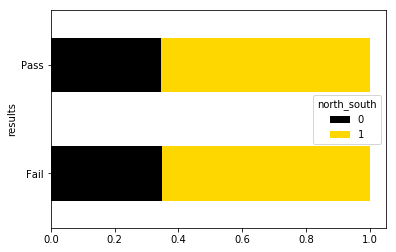

In [29]:
results_count  = pd.crosstab([datos.results], datos.north_south)
results_count.div(results_count.sum(1).astype(float), axis=0).plot.barh(stacked=True, color=['black','gold'])

~Expliación~

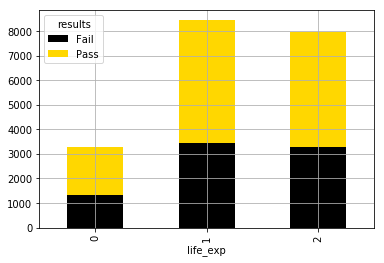

In [30]:
results_count  = pd.crosstab([datos.life_exp], datos.results)
results_count.plot.bar(stacked=True, color=['black','gold'], grid=True)

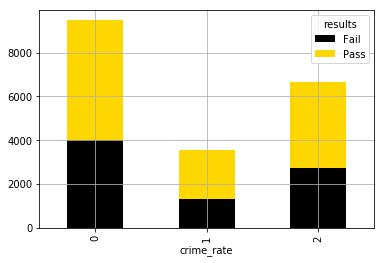

In [32]:
results_count  = pd.crosstab([datos.crime_rate], datos.results)
results_count.plot.bar(stacked=True, color=['black','gold'], grid=True)

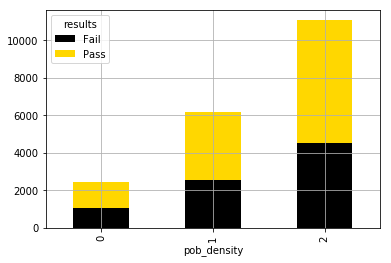

In [31]:
results_count  = pd.crosstab([datos.pob_density], datos.results)
results_count.plot.bar(stacked=True, color=['black','gold'], grid=True)

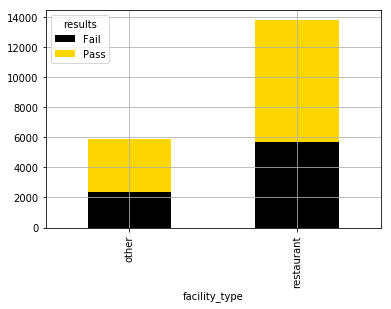

In [33]:
results_count  = pd.crosstab([datos.facility_type], datos.results)
results_count.plot.bar(stacked=True, color=['black','gold'], grid=True)

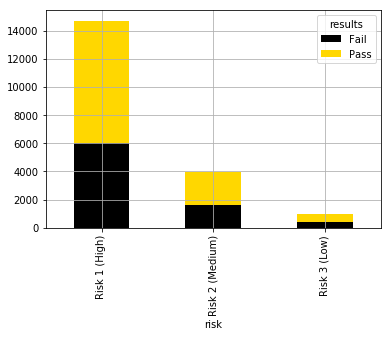

In [34]:
results_count  = pd.crosstab([datos.risk], datos.results)
results_count.plot.bar(stacked=True, color=['black','gold'], grid=True)

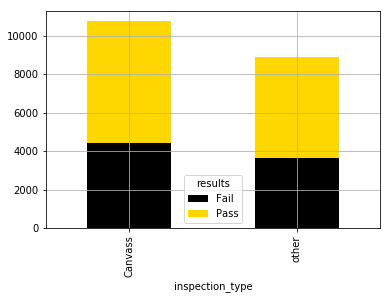

In [39]:
results_count  = pd.crosstab([datos.inspection_type], datos.results)
results_count.plot.bar(stacked=True, color=['black','gold'], grid=True)